# Hauptkomponentenanalyse

 PCA ist eine der häufigsten Anwendungen von SVD und ein unbeaufsichtigter Algorithmus für das maschinelle Lernen.  Dieser wird in der Regel mit PCA abgekürzt und das steht für Principal Component Analysis.Dabei werden nicht korrelierte Features als Ergebnis einer Analyse übrig bleiben und diese werden als Hauptkomponenten bezeichnet. Es heißt, es gibt ein Algorithmus, der aus einer großen Menge an Daten versucht zu extrahieren, was wirklich wichtig ist, diese Hauptkomponente.  

Nicht Korreliert Features,die die wichgiten Informationen eines Datensatzes(Varianz) verkörpern

**1. Redundanz**

**2. Raunchen**

**3. Ausreißer**

werden entfernt.

Ein Beispiel. Stellen Sie sich vor, Sie sind in einer Lebensmittelkette und haben Daten, die vom Kunden generiert wurden. Die haben mit einer Kreditkarte oder so Einkäufe getätigt und der Datensatz beschreibt die Kunden und die von ihnen gekauften Produkte. Das sind eine Vielzahl von Daten und Sie wollen jetzt herausfinden, welche Schlüsselfaktoren interessant sind. Also, was beeinflusst das Kaufverhalten des Kunden, etwa das Alter, das Einkommen etc. Und Sie können jetzt eben PCA anwenden, um die Kundendaten in einen Vektor zu zerlegen, der die Faktoren beschreibt, die das Einkaufsverhalten des Kunden beeinflussen

 Und es gibt einen weiteren Vektor, der die Wahrscheinlichkeiten beschreibt, mit dem Produkte gekauft werden, und zwar Wahrscheinlichkeiten, die auf den wichtigsten Einflussfaktoren basieren. Und alles, was dieses Kaufverhalten nicht beeinflusst, wird einfach weggelassen. Stellen Sie sich vor die Haarfarbe, die dürfte in der Regel keine Relevanz haben, könnte aber möglicherweise dennoch in so einem Datensatz auftauchen. 

Man kann diese PCA für verschiedenste Dinge anwenden, etwa zum Entdecken von

**1. Betrugsfällen**

**2. Spam-Erkennung**

**3. Bilderkennung** 

**4. Spracherkennung** 

**Beispiel mit Aris Dataset:**

In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn
from sklearn.decomposition import PCA
from sklearn import datasets

PCA in Verbindung mit Aries Dataset

In [15]:
iris=datasets.load_iris()
X=iris.data
variable_name=iris.feature_names
X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Erzeugen vom Objekt PCA. Objeckt wird in der Variable PCA gespeichert. 
Mit der Methode fit_transform nehmen wir unsere Daten, die wir hier aus diesem Iris-Dataset geholt haben und transformieren sie über ein PCA-Objekt in eine Form, die wir hier in iris_pca speichern.
Und die so aufbereiteten Daten sollen dann in eine Form gebracht werden, dass wir sie interpretieren können. 

In [18]:
pca=sklearn.decomposition.PCA()
iris_pca=pca.fit_transform(X)

**Varianz-Verhältnis**

Die Varianz beschreibt nun die quadrierte durchschnittliche Entfernung vom Mittelwert.
Die vier zurück gegebenen Komponenten haben eben 100% der Information.

wir haben vier Komponeten

**1. 0.924**

**2. 0.530**

**3. 0.017**

**4. 0.005**
 
Der ersten Komponente hat 92,4% der Variation des Datensatzes enthalten. Das heißt, die wichtigen Informationen in einer Hauptkomponente sind zu 92,4% dadrin.Der zweite Kompomente hat 5,5% der Informationen der Dritte 0,017% und die vierte 0,05%.

**Entscheidungshilfe: 70% der Kumulative vazianz soll behalten werden.**

Wir nehmen also für die nächsten Schritte nur die ersten beiden Komponenten,da wir wissen, dass sie **97,7%** der ursprünglichen Information des Datensatzes Halten.

In [19]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

Die Summe der Variaatinen von den Vier Kopomenten ist gliech 1 (Kumulative Varianz)

In [24]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

Wir zeigen erste die vier Kompmenten in ein DataFrame.
Und übergeben unsere PCA-Komponenten als ersten Parameter und als zweiten Parameter können Sie bei Bedarf die Spaltennamen setzen, 

In [33]:
comps=pd.DataFrame(pca.components_,columns=variable_name)

comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361590,-0.082269,0.856572,0.358844
1,0.656540,0.729712,-0.175767,-0.074706
2,-0.580997,0.596418,0.072524,0.549061
3,0.317255,-0.324094,-0.479719,0.751121


**Haupcompomente**

1. Faktor 1 -> 0  Zeile

2. Faktor 2 -> 1  Zeile


Die erläuterte Varianz, die wir uns zuvor schon angesehen haben, ergab, dass die ersten beiden Hauptkomponenten über 97,7% der gesamten Information des Datensatzes enthielten. Aufgrund dieser Information ist es sinnvoll zu beschließen, dass nur diese beiden Komponenten beibehalten werden. 

Die Ergebnisse dieser Korrelation zwar einmal gerade zeigen, dass eine Hauptkomponente eine starke positive Korrelation mit der Blütenblattlänge und eine moderate positive Korrelation mit der Kelchblattlänge und der Blütenblattbreite aufweist. 

Die erste Komponente ist jedoch auch leicht negativ mit der Kelchblattbreite korreliert und die zweite Hauptkomponente ist stark negativ mit der Kelchblattlänge und der Kelchblattbreite korreliert und leicht negativ mit der Blütenblattlänge und der Blütenblattbreite. 


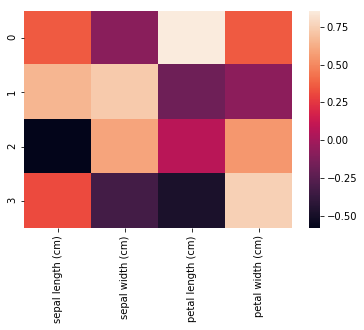

In [35]:
sb.heatmap(comps)

## Diese Daten(Faktor 0 und 1) können  als Eingabe-Variablen für das maschinelle Lernen für Lernalgorithmen verwenden.##